# Tensorflow -- Mnist

## Import

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


## Dataset

### Load Fashion Mnist

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Show Images

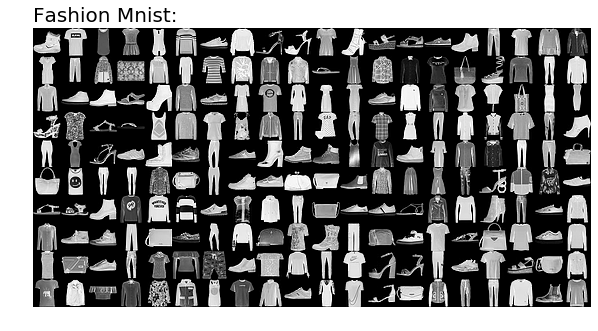

In [4]:
def show_mnist(X, title = None, loc = 'center',**kwargs):
    num = X.shape[0]
    if num <= 10:
        imgs = np.moveaxis(X.reshape(-1, num, 28, 28), 1, 2).reshape(-1, num * 28)
        plt.figure(figsize=(num/2,num))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    elif num <= 100 and num % 10 == 0:
        imgs = np.moveaxis(X.reshape(-1, 10, 28, 28), 1, 2).reshape(-1, 10 * 28)
        plt.figure(figsize=(10,20))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    elif num <= 200 and num % 20 == 0:
        imgs = np.moveaxis(X.reshape(-1, 20, 28, 28), 1, 2).reshape(-1, 20 * 28)
        plt.figure(figsize=(10,20))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs,cmap = plt.cm.gray)
    else:
        print(f'{num} not fit, choose from:')
        print(list(range(1,10)))
        print([x for x in range(10,100,10)])
        print([x for x in range(100,1000,100)])
    plt.show()
show_mnist(train_images[:200],title='Fashion Mnist:', loc='left', fontsize=20)

### Split Validation Images

In [5]:
validation_images = train_images[:10000]
validation_labels = train_labels[:10000]
training_images = train_images[10000:]
training_labels = train_labels[10000:]

print(f' training size:    {training_images.shape}; train labels size:      {training_labels.shape};\n',
      f'validation size : {validation_images.shape}; validation labels size: {validation_labels.shape};\n',
      f'test size:        {test_images.shape}; test labels size:       {test_labels.shape};')

 training size:    (50000, 28, 28); train labels size:      (50000,);
 validation size : (10000, 28, 28); validation labels size: (10000,);
 test size:        (10000, 28, 28); test labels size:       (10000,);


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess

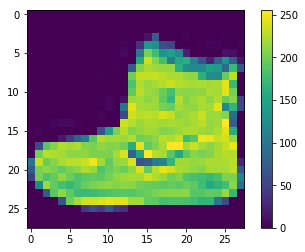

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

### Normalization

In [8]:
training_images = training_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

### Test Labels

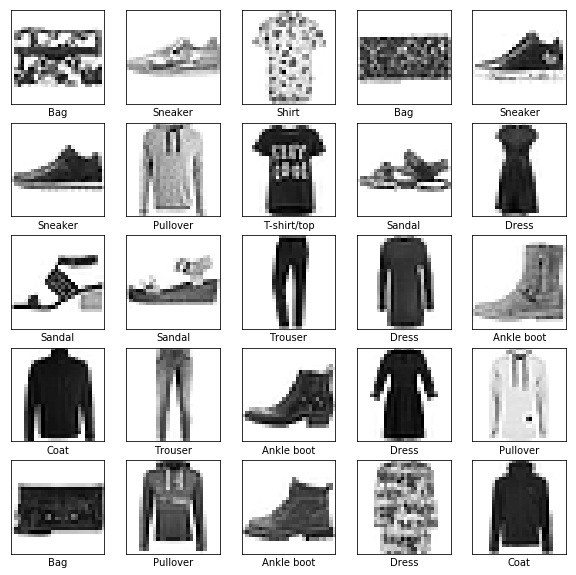

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i]])

## Model

### Construct

In [10]:
models = []
for _ in range(5):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax)
        ])
    models.append(model)

### Compile

In [11]:
for model in models:
    model.compile(optimizer=tf.train.AdamOptimizer(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

### Train

In [12]:
hists = []
for i,model in enumerate(models):
    num = (i+1) * 10000
    hist = model.fit(training_images[:num], training_labels[:num], epochs=10, 
                 validation_data=(validation_images, validation_labels))
    hists.append(hist)

Train on 10000 samples, validate on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 2s 169us/step - loss: 0.6974 - acc: 0.7556 - val_loss: 0.5445 - val_acc: 0.8113
Epoch 2/10
10000/10000 [==============================] - 1s 92us/step - loss: 0.4873 - acc: 0.8244 - val_loss: 0.4826 - val_acc: 0.8301
Epoch 3/10
10000/10000 [==============================] - 1s 81us/step - loss: 0.4406 - acc: 0.8421 - val_loss: 0.4837 - val_acc: 0.8316
Epoch 4/10
10000/10000 [==============================] - 1s 82us/step - loss: 0.4132 - acc: 0.8482 - val_loss: 0.4603 - val_acc: 0.8399
Epoch 5/10
10000/10000 [==============================] - 1s 78us/step - loss: 0.3744 - acc: 0.8608 - val_loss: 0.4319 - val_acc: 0.8537
Epoch 6/10
10000/10000 [==============================] - 1s 88us/step - loss: 0.3575 - acc: 0.8671 - val_loss: 0.3964 - val_acc: 0.8609
Epoch 7/10
10000/10000 [==============================] - 1s 82us/step - loss: 0.3379 - acc: 0.8751 - val_loss: 0.4083 - val_ac

### Validation

In [13]:
for i, model in enumerate(models):
    validation_loss, validation_acc = model.evaluate(validation_images, validation_labels)

    print(f'Validation accuracy(Model {i}):', validation_acc)

10000/10000 [==============================] - 0s 39us/step
Validation accuracy(Model 0): 0.8595
10000/10000 [==============================] - 1s 52us/step
Validation accuracy(Model 1): 0.8739
10000/10000 [==============================] - 0s 39us/step
Validation accuracy(Model 2): 0.8706
10000/10000 [==============================] - 0s 38us/step
Validation accuracy(Model 3): 0.89
10000/10000 [==============================] - 1s 54us/step
Validation accuracy(Model 4): 0.8912


### Test

In [14]:
for i, model in enumerate(models):
    
    test_loss, test_acc = model.evaluate(test_images, test_labels)

    print(f'Test accuracy(Model {i}):', test_acc)

10000/10000 [==============================] - 0s 39us/step
Test accuracy(Model 0): 0.8534
10000/10000 [==============================] - 0s 38us/step
Test accuracy(Model 1): 0.8631
10000/10000 [==============================] - 0s 39us/step
Test accuracy(Model 2): 0.8632
10000/10000 [==============================] - 0s 43us/step
Test accuracy(Model 3): 0.8809
10000/10000 [==============================] - 0s 38us/step
Test accuracy(Model 4): 0.8846


### Predict

In [14]:
predictions = model.predict(test_images)
predictions[0]

array([4.1810218e-09, 1.7205578e-13, 1.7288624e-11, 2.9321344e-11,
       2.9515403e-09, 3.6732890e-04, 3.6858784e-12, 1.2484217e-01,
       3.7922050e-08, 8.7479055e-01], dtype=float32)

In [15]:
print(f' Predict Label:  {np.argmax(predictions[0])};\n',
      f'Test Label:     {test_labels[0]};')

 Predict Label:  9;
 Test Label:     9;


## Analyze

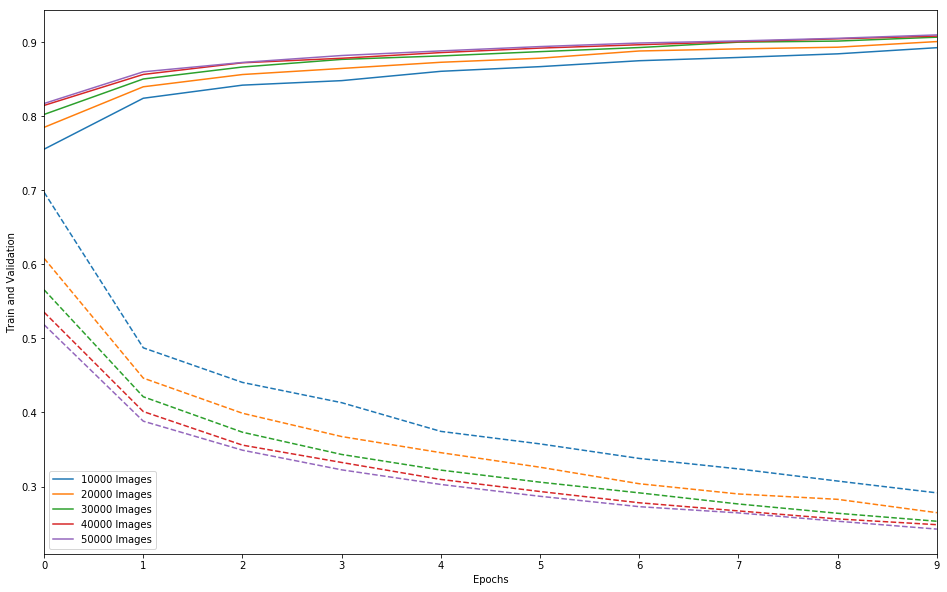

In [21]:
def plot_history(hist):
    
    plt.figure(figsize=(16,10))
    for i,history in enumerate(hist):
        l = str((i+1)*10000) + ' Images'
        acc = plt.plot(history.epoch, history.history['acc'],label=l)
        
        plt.plot(history.epoch, history.history['loss'],
                   '--',color=acc[0].get_color(),)

    plt.xlabel('Epochs')
    plt.ylabel('Train and Validation')
    plt.legend()

    plt.xlim([0,max(history.epoch)])
plot_history(hists)